In [1]:
!pip install prophet


In [3]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

In [8]:
!pip install cmdstanpy


In [10]:
!pip install prophet --user


In [1]:
from prophet import Prophet


In [3]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

In [16]:
data = pd.read_csv('Arima_Rathnapura.csv')


In [17]:
data.head()

,Month,Production/Kg
0,2016-01-01,6114284.0
1,2016-02-01,5452146.0
2,2016-03-01,5424558.0
3,2016-04-01,6383458.0
4,2016-05-01,6552106.0


In [ ]:
train=ts[:64]
test=ts[64:]

In [18]:
data.columns

Index(['Month', 'Production/Kg'], dtype='object')

In [10]:
data['Production/Kg'] = data['Production/Kg'].astype(float)

In [19]:
data.columns

Index(['Month', 'Production/Kg'], dtype='object')

In [20]:
data.describe()

,Production/Kg
count,8.400000e+01
mean,5.473145e+06
std,8.622616e+05
min,3.193826e+06
25%,4.912158e+06
50%,5.544591e+06
75%,6.103642e+06
max,7.235867e+06


In [21]:
data.dtypes

Month             object
Production/Kg    float64
dtype: object

In [22]:
df = pd.DataFrame(data)


In [23]:
df['Month'] = pd.to_datetime(df['Month'])


In [24]:
df['Year'] = df['Month'].dt.year
df['Month_num'] = df['Month'].dt.month
df['Day'] = df['Month'].dt.day


In [25]:
df = df.rename(columns={'Month': 'ds', 'Production/Kg': 'y'})


In [26]:
model = Prophet()
model.fit(df)

09:13:14 - cmdstanpy - INFO - Chain [1] start processing
09:13:14 - cmdstanpy - INFO - Chain [1] done processing


In [27]:
future = model.make_future_dataframe(periods=12, freq='MS')
forecast = model.predict(future)

In [39]:
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])


           ds          yhat    yhat_lower    yhat_upper
0  2016-01-01  5.760669e+06  5.017076e+06  6.472116e+06
1  2016-02-01  4.803872e+06  4.042137e+06  5.578168e+06
2  2016-03-01  5.388087e+06  4.652205e+06  6.148044e+06
3  2016-04-01  6.750236e+06  5.999529e+06  7.504413e+06
4  2016-05-01  6.814927e+06  6.102057e+06  7.530218e+06
..        ...           ...           ...           ...
91 2023-08-01  4.691909e+06  3.953580e+06  5.478743e+06
92 2023-09-01  4.491261e+06  3.809964e+06  5.245644e+06
93 2023-10-01  4.708329e+06  3.984414e+06  5.379992e+06
94 2023-11-01  4.000773e+06  3.229701e+06  4.734426e+06
95 2023-12-01  4.074414e+06  3.309433e+06  4.824051e+06

[96 rows x 4 columns]


C:\Users\RANASINGHE\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\RANASINGHE\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


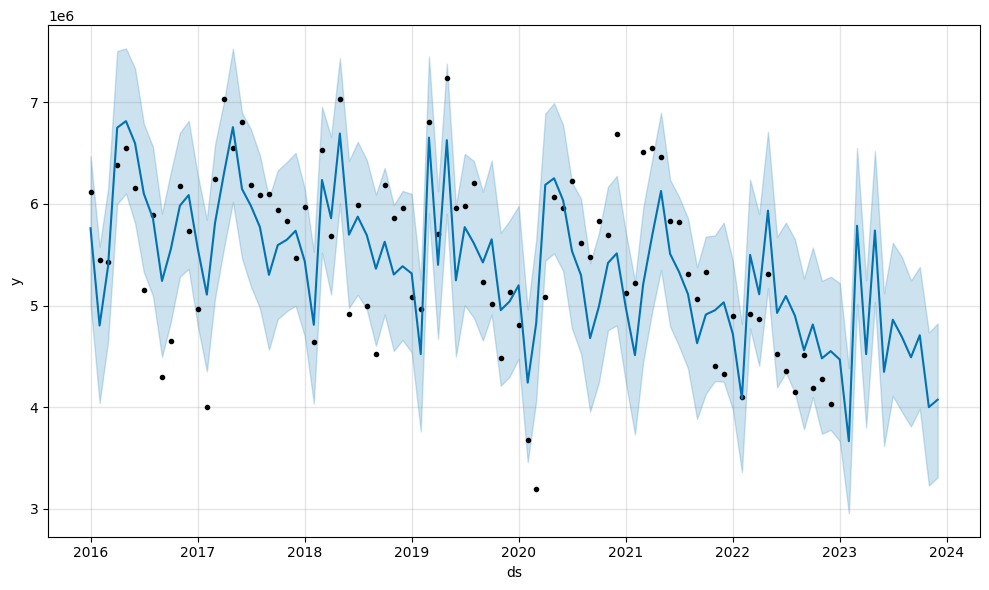

In [29]:
fig1 = model.plot(forecast)


C:\Users\RANASINGHE\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\RANASINGHE\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
C:\Users\RANASINGHE\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will retur

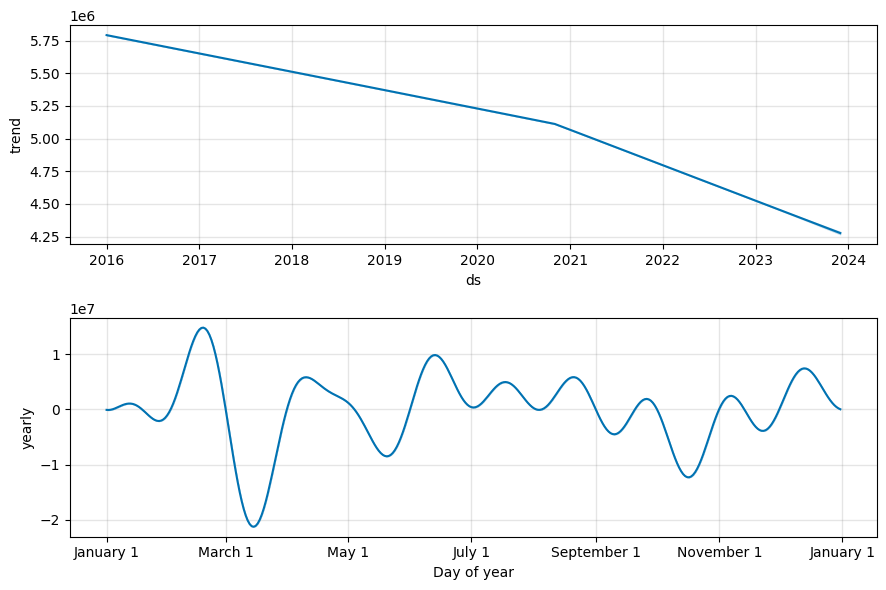

In [30]:
fig2 = model.plot_components(forecast)


In [31]:
plt.show()


In [32]:
from sklearn.metrics import mean_absolute_error


In [35]:
from prophet.diagnostics import cross_validation, performance_metrics


In [36]:
df_cv = cross_validation(model, initial='730 days', period='180 days', horizon='365 days')
df_p = performance_metrics(df_cv)
df_p.head()

  0%|          | 0/8 [00:00<?, ?it/s]

09:33:02 - cmdstanpy - INFO - Chain [1] start processing
09:33:03 - cmdstanpy - INFO - Chain [1] done processing
09:33:03 - cmdstanpy - INFO - Chain [1] start processing
09:33:03 - cmdstanpy - INFO - Chain [1] done processing
09:33:03 - cmdstanpy - INFO - Chain [1] start processing
09:33:03 - cmdstanpy - INFO - Chain [1] done processing
09:33:03 - cmdstanpy - INFO - Chain [1] start processing
09:33:03 - cmdstanpy - INFO - Chain [1] done processing
09:33:04 - cmdstanpy - INFO - Chain [1] start processing
09:33:04 - cmdstanpy - INFO - Chain [1] done processing
09:33:04 - cmdstanpy - INFO - Chain [1] start processing
09:33:04 - cmdstanpy - INFO - Chain [1] done processing
09:33:04 - cmdstanpy - INFO - Chain [1] start processing
09:33:04 - cmdstanpy - INFO - Chain [1] done processing
09:33:05 - cmdstanpy - INFO - Chain [1] start processing
09:33:05 - cmdstanpy - INFO - Chain [1] done processing


,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,42 days,4.895340e+11,699667.085561,570348.980545,0.104233,0.105053,0.099943,0.333333
1,46 days,4.485239e+11,669719.246766,518582.311821,0.096207,0.071911,0.092441,0.444444
2,47 days,5.113308e+11,715073.957210,547930.866903,0.097220,0.071911,0.097491,0.444444
3,51 days,6.906550e+11,831056.558418,620151.833751,0.127475,0.071911,0.120665,0.444444
4,53 days,5.868272e+11,766046.490402,538630.806804,0.109618,0.048087,0.105132,0.555556


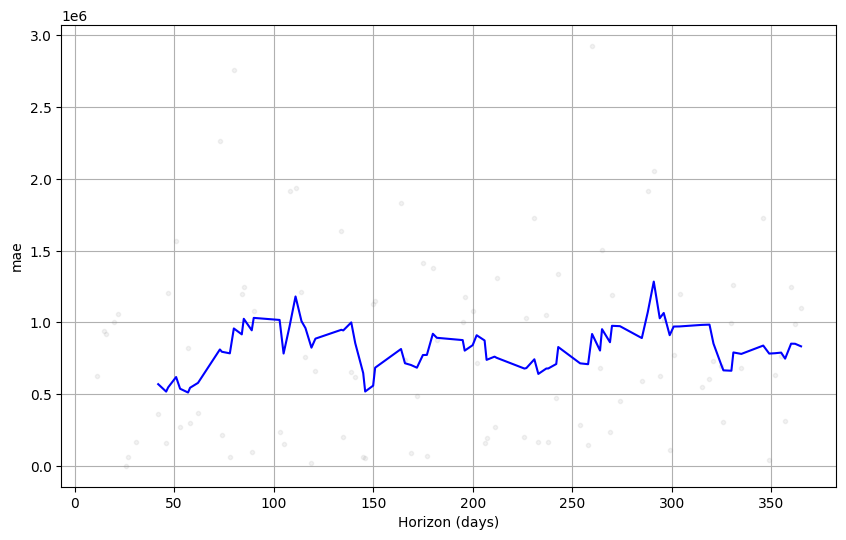

In [37]:
from prophet.plot import plot_cross_validation_metric
fig3 = plot_cross_validation_metric(df_cv, metric='mae')
plt.show()

16:05:56 - cmdstanpy - INFO - Chain [1] start processing
16:05:56 - cmdstanpy - INFO - Chain [1] done processing


           ds          y  yhat  error
0  2023-01-01  4135852.0   NaN    NaN
1  2023-02-01  4002803.0   NaN    NaN
2  2023-03-01  4663158.0   NaN    NaN
3  2023-04-01  5096599.0   NaN    NaN
4  2023-05-01  5243251.0   NaN    NaN
5  2023-06-01  4779026.0   NaN    NaN
6  2023-07-01  4773467.0   NaN    NaN
7  2023-08-01  3533969.0   NaN    NaN
8  2023-09-01  3661037.0   NaN    NaN
9  2023-10-01  5632403.0   NaN    NaN
10 2023-11-01  3794066.0   NaN    NaN
11 2023-12-01  4379352.0   NaN    NaN


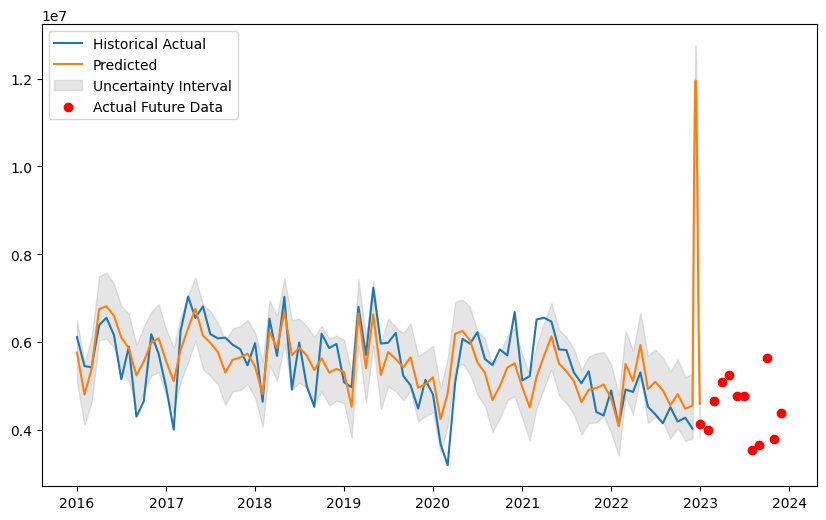

In [44]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Load your historical data
data = pd.read_csv('Arima_Rathnapura.csv')  # Replace with your actual file path
data.columns = ['ds', 'y']
data['ds'] = pd.to_datetime(data['ds'])

# Initialize and fit the model
model = Prophet()
model.fit(data)

# Create a DataFrame with future dates
future = model.make_future_dataframe(periods=30)

# Make predictions
forecast = model.predict(future)

# Load actual future data for comparison
actual_future_data = pd.read_csv('RathnapuraActualValues.csv')  # Replace with your actual file path
actual_future_data.columns = ['ds', 'y']
actual_future_data['ds'] = pd.to_datetime(actual_future_data['ds'])

# Merge the actual future data with the forecasted values
merged = pd.merge(actual_future_data, forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']], on='ds', how='left')

# Calculate the error
merged['error'] = merged['y'] - merged['yhat']

# Display the results
print(merged[['ds', 'y', 'yhat', 'error']])

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(data['ds'], data['y'], label='Historical Actual')
plt.plot(forecast['ds'], forecast['yhat'], label='Predicted')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='gray', alpha=0.2, label='Uncertainty Interval')
plt.scatter(merged['ds'], merged['y'], color='red', label='Actual Future Data')  # Plot actual future data points
plt.legend()
plt.show()


16:04:38 - cmdstanpy - INFO - Chain [1] start processing
16:04:39 - cmdstanpy - INFO - Chain [1] done processing


           ds          y  yhat  error
0  2023-01-01  4135852.0   NaN    NaN
1  2023-02-01  4002803.0   NaN    NaN
2  2023-03-01  4663158.0   NaN    NaN
3  2023-04-01  5096599.0   NaN    NaN
4  2023-05-01  5243251.0   NaN    NaN
5  2023-06-01  4779026.0   NaN    NaN
6  2023-07-01  4773467.0   NaN    NaN
7  2023-08-01  3533969.0   NaN    NaN
8  2023-09-01  3661037.0   NaN    NaN
9  2023-10-01  5632403.0   NaN    NaN
10 2023-11-01  3794066.0   NaN    NaN
11 2023-12-01  4379352.0   NaN    NaN


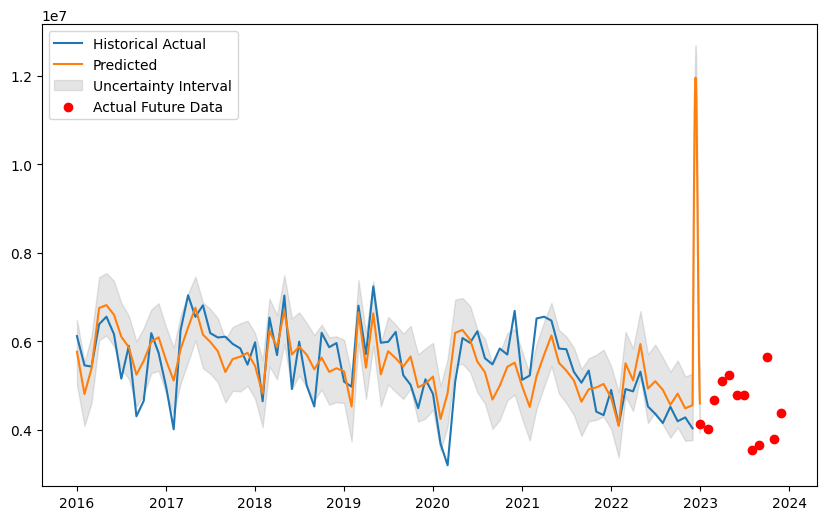

In [43]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Load your historical data
data = pd.read_csv('Arima_Rathnapura.csv')  # Replace with your actual file path

# Ensure the DataFrame has the correct column names
data.columns = ['ds', 'y']  # Rename columns to 'ds' (date) and 'y' (value)

# Convert the 'ds' column to datetime format if it's not already
data['ds'] = pd.to_datetime(data['ds'])

# Initialize and fit the model
model = Prophet()
model.fit(data)

# Create a DataFrame with future dates, ensuring it covers the range of actual future data
future = model.make_future_dataframe(periods=30)  # Predicting 30 days into the future

# Make predictions
forecast = model.predict(future)

# Load actual future data for comparison
actual_future_data = pd.read_csv('RathnapuraActualValues.csv')  # Replace with your actual file path
actual_future_data.columns = ['ds', 'y']
actual_future_data['ds'] = pd.to_datetime(actual_future_data['ds'])

# Filter forecast to match the dates of actual future data
forecast_filtered = forecast[forecast['ds'].isin(actual_future_data['ds'])]

# Merge the actual future data with the filtered forecasted values
merged = pd.merge(actual_future_data, forecast_filtered[['ds', 'yhat', 'yhat_lower', 'yhat_upper']], on='ds', how='left')

# Calculate the error
merged['error'] = merged['y'] - merged['yhat']

# Display the results
print(merged[['ds', 'y', 'yhat', 'error']])

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(data['ds'], data['y'], label='Historical Actual')
plt.plot(forecast['ds'], forecast['yhat'], label='Predicted')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='gray', alpha=0.2, label='Uncertainty Interval')
plt.scatter(merged['ds'], merged['y'], color='red', label='Actual Future Data')  # Plot actual future data points
plt.legend()
plt.show()
